In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
# Load the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv.xls")


In [4]:
# Step 1: Explore the dataset
print("Initial Info:\n")
print(df.info())
print("\nMissing values:\n")
print(df.isnull().sum())
print("\nFirst 5 rows:\n")
print(df.head())

Initial Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          6

In [5]:
# Step 2: Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns='Cabin', inplace=True)  # Too many missing values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-5-833088818.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-5-833088818.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [6]:
# Step 3: Encode categorical variables
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male: 1, female: 0
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [7]:
# Step 4: Standardize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


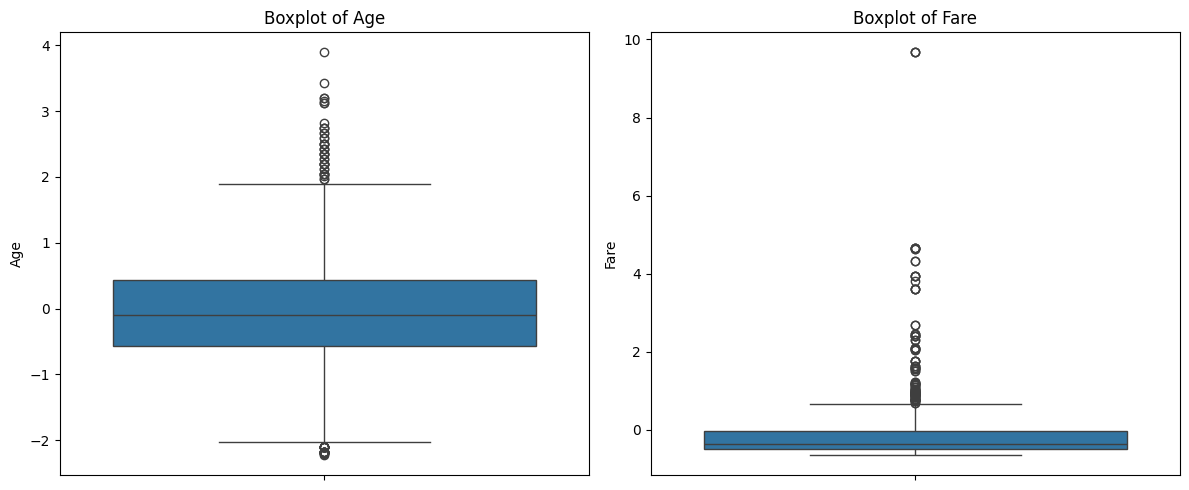

In [8]:
# Step 5: Visualize outliers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot of Age")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot of Fare")
plt.tight_layout()
plt.show()


In [9]:
# Step 6: Remove outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'Age')
df = remove_outliers_iqr(df, 'Fare')

In [10]:
# Final check
print("\nAfter cleaning, dataset shape:", df.shape)
print("\nCleaned data preview:\n")
print(df.head())


After cleaning, dataset shape: (718, 12)

Cleaned data preview:

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    1 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    0 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  0.433312      1      0   
4                      Allen, Mr. William Henry    1  0.433312      0      0   
5                              Moran, Mr. James    1 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4           

In [12]:
print("\n# Summary Statistics:")
print(df.describe(include='all'))



# Summary Statistics:
        PassengerId    Survived      Pclass                 Name         Sex  \
count    718.000000  718.000000  718.000000                  718  718.000000   
unique          NaN         NaN         NaN                  718         NaN   
top             NaN         NaN         NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN         NaN                    1         NaN   
mean     447.883008    0.334262    2.512535                  NaN    0.681058   
std      259.549777    0.472061    0.715818                  NaN    0.466391   
min        1.000000    0.000000    1.000000                  NaN    0.000000   
25%      220.250000    0.000000    2.000000                  NaN    0.000000   
50%      447.500000    0.000000    3.000000                  NaN    1.000000   
75%      673.500000    1.000000    3.000000                  NaN    1.000000   
max      891.000000    1.000000    3.000000                  NaN    1.000000   

               A

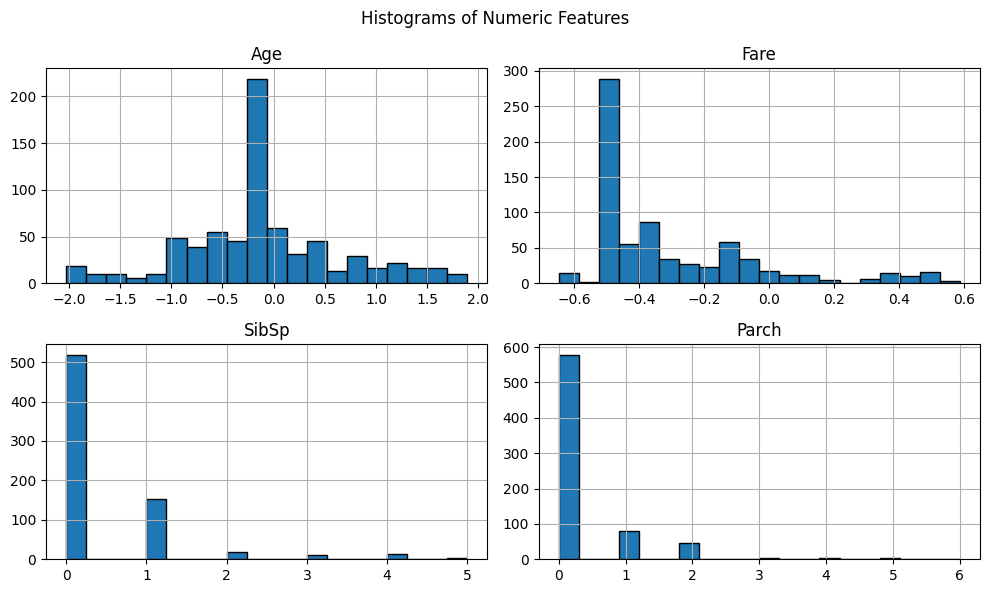

In [13]:

# Histogram for numeric features
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[numeric_cols].hist(bins=20, figsize=(10, 6), edgecolor='black')
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

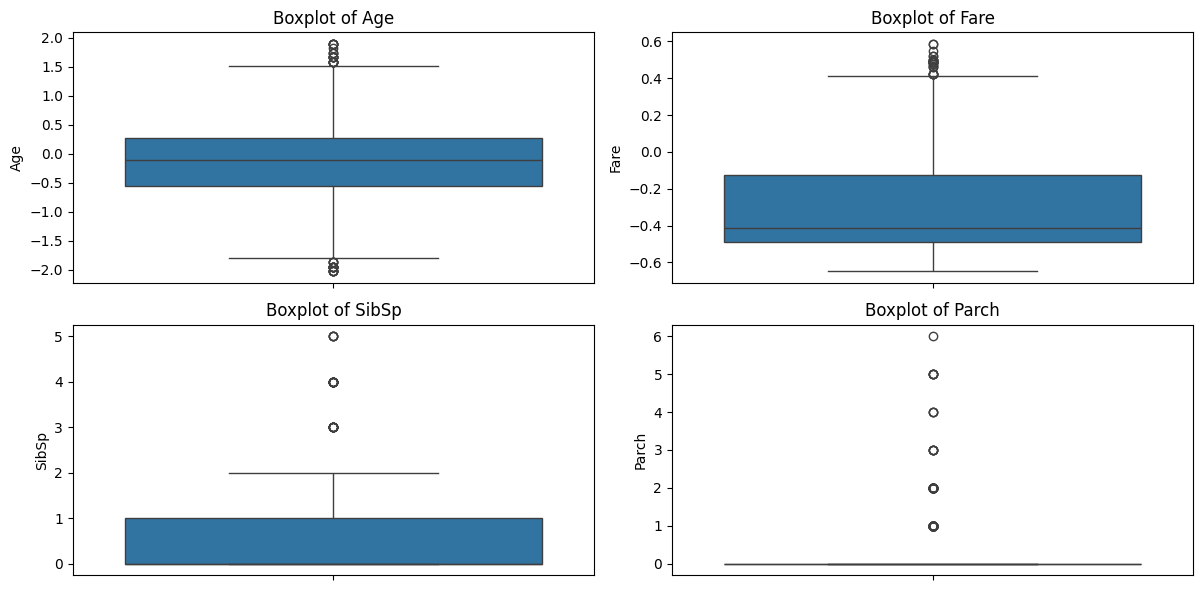

In [14]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


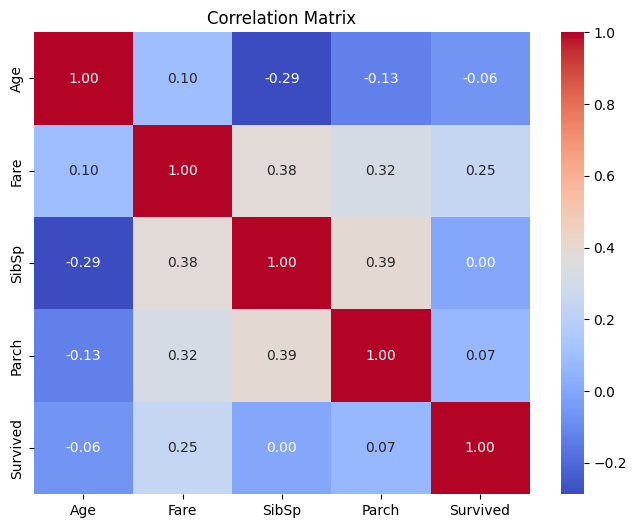

In [15]:
# Drop non-numeric columns for correlation
corr_matrix = df[numeric_cols + ['Survived']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

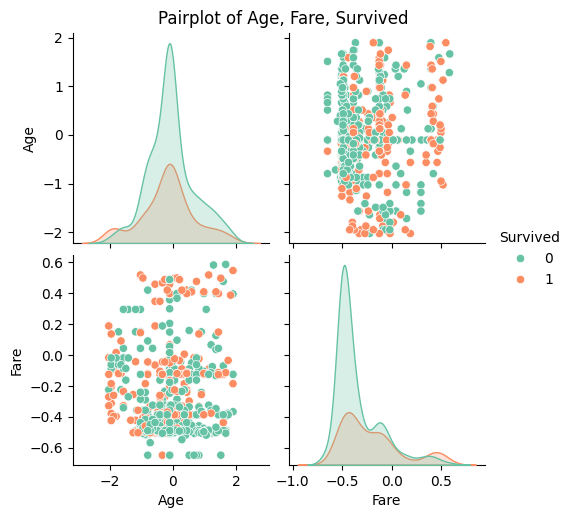

In [16]:
# Pairplot (only small subset to avoid clutter)
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived', palette='Set2')
plt.suptitle("Pairplot of Age, Fare, Survived", y=1.02)
plt.show()

In [19]:
#  Detecting Patterns / Trends

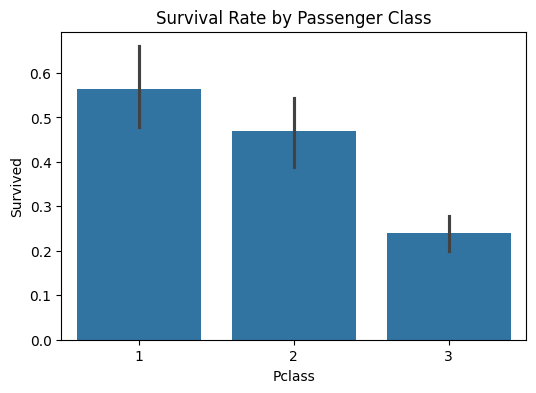

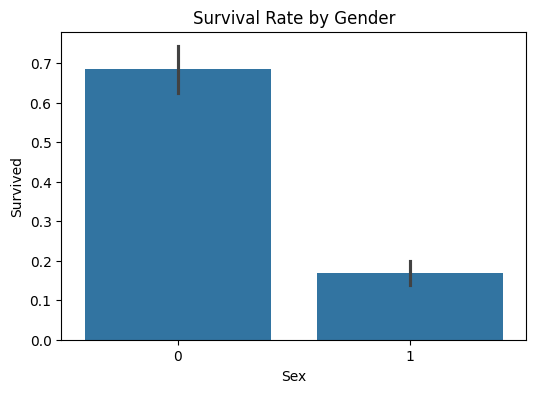

In [18]:
# Survival rate by Pclass
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by Sex
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

In [22]:
# Interactive scatter plot
import plotly.express as px

fig = px.scatter(df, x="Age", y="Fare", color="Survived",
                 title="Age vs Fare by Survival", hover_data=['Sex', 'Pclass'])
fig.show()